In [ ]:
# Kod dla wykresu z trasami z największym średnim opóźnieniem 

In [3]:
import pandas as pd 
import numpy as np
from util.getData import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = getData(["Origin", "Dest", "ArrDelay", "Cancelled"])

In [5]:
routeDel = df.loc[df.Cancelled == 0, ["Origin", "Dest", "ArrDelay"]]

In [6]:
routeDel['count'] = routeDel.groupby(["Origin", "Dest"])["Origin"].transform('count')
routeDel = routeDel.loc[routeDel['count'] >= 1000]
routeDel = routeDel.drop(columns=['count'])

In [7]:
routeDel = routeDel.groupby(['Origin', 'Dest']).mean()
routeDel = routeDel.rename(columns={'ArrDelay' : 'AverageDelay'})

In [8]:
routeDel = routeDel.sort_values('AverageDelay', ascending=False).head(10)
routeDel = routeDel.reset_index()
print(routeDel)

  Origin Dest  AverageDelay
0    LEX  EWR     31.270535
1    MSN  EWR     30.647027
2    JAC  ORD     30.460232
3    BGR  EWR     30.327706
4    ACK  EWR     30.118310
5    IAD  BHM     29.032258
6    EWR  LIT     28.991925
7    HDN  ORD     27.687749
8    ATL  HHH     27.141700
9    ORD  MQT     26.125300


In [9]:
routeDel["Route"] = routeDel.Origin.astype(str) + " -> " +  routeDel.Dest.astype(str)
routeDel = routeDel.iloc[:, [3, 2]]
print(routeDel)


        Route  AverageDelay
0  LEX -> EWR     31.270535
1  MSN -> EWR     30.647027
2  JAC -> ORD     30.460232
3  BGR -> EWR     30.327706
4  ACK -> EWR     30.118310
5  IAD -> BHM     29.032258
6  EWR -> LIT     28.991925
7  HDN -> ORD     27.687749
8  ATL -> HHH     27.141700
9  ORD -> MQT     26.125300


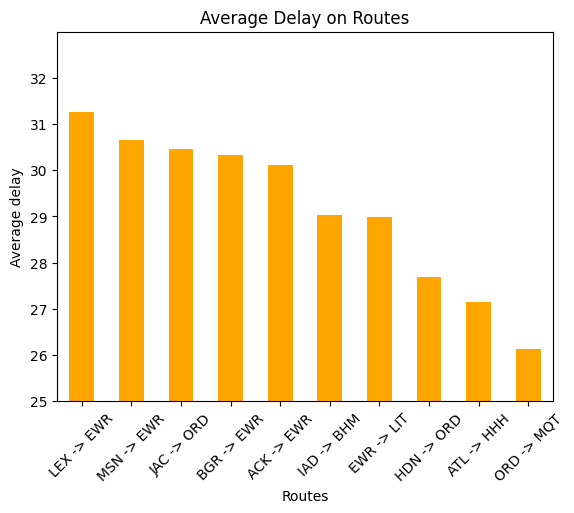

In [10]:
routeDel.plot(kind="bar", color="orange", legend=None)
plt.title("Average Delay on Routes")
plt.xlabel("Routes")
plt.ylabel("Average delay")
plt.xticks(np.arange(10), list(routeDel.Route), rotation=45)
plt.ylim(25, 33)
plt.yticks(np.arange(25, 33))
plt.show()